In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("D:\projects\machine learning\DataScience\Dataset\Wholesale customers data.xlsx")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [10]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
df = df[df.Fresh<df.Fresh.quantile(0.995)]
df = df[df.Milk<df.Milk.quantile(0.995)]
df = df[df.Frozen<df.Frozen.quantile(0.995)]
print(df.shape)
df.skew()

(431, 8)


Channel             0.762093
Region             -1.260103
Fresh               1.586270
Milk                2.398328
Grocery             2.704807
Frozen              2.287323
Detergents_Paper    3.247208
Delicassen          4.483010
dtype: float64

In [21]:
df2 = df[['Fresh','Milk','Frozen','Grocery']]

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df2)

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5)
model.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [24]:
model.cluster_centers_

array([[-0.26422188, -0.32638819, -0.34768677, -0.29732075],
       [-0.40004939,  1.68353952, -0.25794689,  1.64985908],
       [ 1.24050439, -0.32665195,  1.40318159, -0.39680056]])

In [25]:
pd.DataFrame(model.cluster_centers_,columns=df2.columns)

,Fresh,Milk,Frozen,Grocery
0,-0.264222,-0.326388,-0.347687,-0.297321
1,-0.400049,1.683540,-0.257947,1.649859
2,1.240504,-0.326652,1.403182,-0.396801


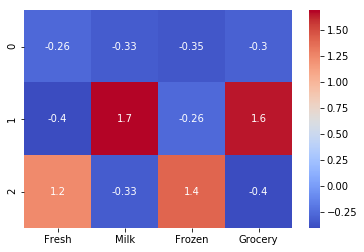

In [26]:
sns.heatmap(pd.DataFrame(model.cluster_centers_,columns=df2.columns),annot=True,cmap='coolwarm')
plt.show()

d:\anaconda\envs\home\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


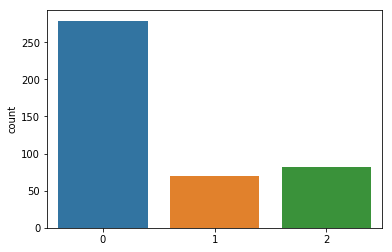

In [27]:
sns.countplot(model.labels_)
plt.show()

In [30]:
k=[]
inertia = []
for i in range(1,12):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df3)
    inertia.append(model.inertia_)
    k.append(i)

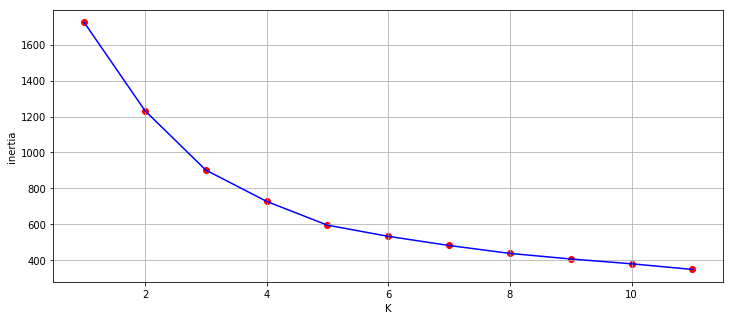

In [31]:
plt.figure(figsize=(12,5))
plt.scatter(k,inertia,c='r')
plt.plot(k,inertia,c='b')
plt.grid(True)
plt.xlabel("K")
plt.ylabel("inertia")
plt.show()